In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit


%matplotlib inline

data = pd.read_csv('housingdata.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each.


In [2]:
minimum_price = np.amin(prices)
maximum_price = np.amax(prices)
mean_price = np.mean(prices)
median_price = np.median(prices)
std_price = np.std(prices)

print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105000.0
Maximum price: $1024800.0
Mean price: $454342.9447852761
Median price $438900.0
Standard deviation of prices: $165171.13154429477


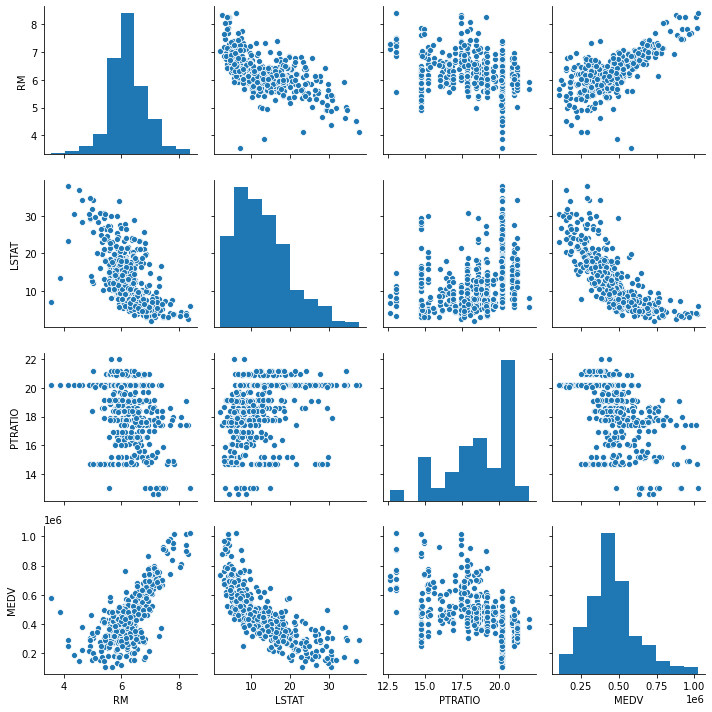

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.pairplot(data,height=2.5)
plt.tight_layout()

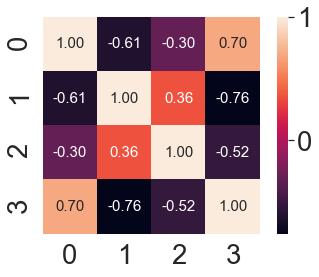

In [4]:
cm = np.corrcoef(data.values.T)
sns.set(font_scale = 2.5)
hm = sns.heatmap(cm,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size': 15},
                )


In [5]:
from sklearn.metrics import r2_score
def performance_metric(y_true,y_predict):
    score = r2_score(y_true,y_predict)
    return score


In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,prices,test_size=0.2,random_state=42)
print("Training and test data split was successful.")

Training and test data split was successful.


/Users/vishaljha/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:589: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/vishaljha/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:589: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/vishaljha/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:589: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/vishaljha/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:589: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/vishaljha/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:589: UndefinedMetricWarning: R^2 score is 

/Users/vishaljha/Desktop/ML/House price predictor/visuals.py:68: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


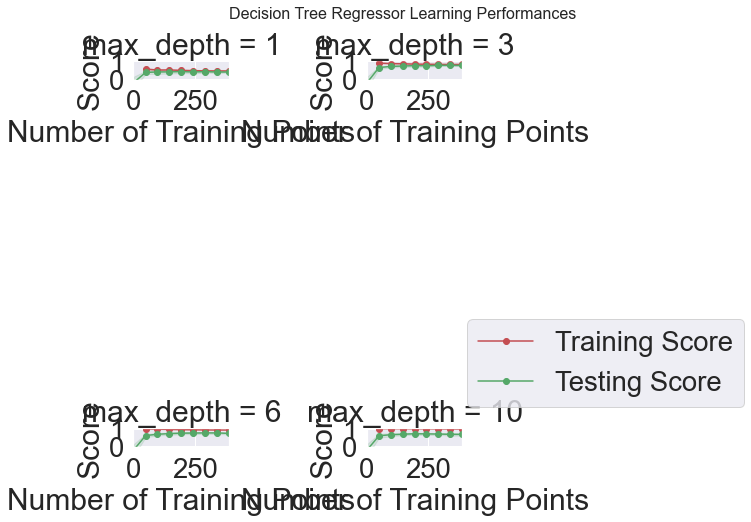

In [7]:
import visuals as vs

vs.ModelLearning(features,prices)

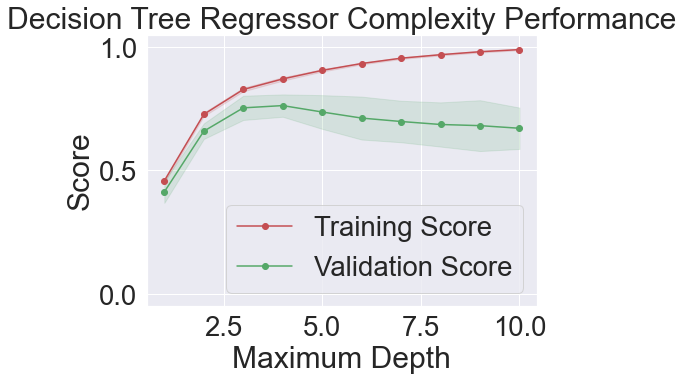

In [8]:
vs.ModelComplexity(X_train,y_train)

In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

def fit_model(X,y):
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)
    regressor = DecisionTreeRegressor()
    params = {'max_depth' : [1,2,3,4,5,6,7,8,9,10]}
    
    scoring_fnc = make_scorer(performance_metric)
    
    grid = GridSearchCV(estimator = regressor, param_grid = params, scoring = scoring_fnc, cv = cv_sets)
    grid = grid.fit(X,y)
    
    return grid.best_estimator_


In [10]:
reg = fit_model(X_train, y_train)

print("Parameter 'max_depth' is {} for optimal.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for optimal.


In [11]:
client_data = [[5,17,15],[4,32,22],[8,3,12]]

for i,price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $403,025.00
Predicted selling price for Client 2's home: $237,478.72
Predicted selling price for Client 3's home: $931,636.36


In [12]:
vs.PredictTrials(features,prices,fit_model,client_data)

Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61
